**Offensive Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import numpy as np

In [2]:
# Load the data 
df = pd.read_json("Data_cleaning/final_df.json", orient='index')

In [3]:
# Create Barthag Rank (higher Barthag = better team, so rank descending)
df['Barthag Rank'] = df.groupby('Year')['Barthag'].rank(ascending=False, method='min')
df.head()

,Year,Seed,School,Round Finished,Conf,G,Rec,AdjOE,AdjDE,AdjNR,...,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Barthag Rank
0,2008,1,Kansas,6,B12,33,30–3,121.1,85.9,35.2,...,30.8,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0
1,2008,1,Memphis,5,CUSA,34,33–1,113.4,84.0,29.4,...,32.7,53.3,41.6,35.0,29.8,36.7,28.7,70.7,9.0,2.0
2,2008,1,UCLA,4,P10,33,30–3,116.4,87.2,29.2,...,25.7,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.7,3.0
3,2008,3,Wisconsin,2,B10,33,29–4,112.3,85.2,27.1,...,25.4,49.2,41.3,35.9,31.1,31.1,32.8,63.5,8.2,4.0
4,2008,2,Duke,1,ACC,32,27–5,117.3,89.0,28.3,...,32.0,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,5.0


**Top Offensive Teams by Year**

In [31]:
# Sort and get top 10 offensive teams by AdjOE per year
top_offensive_teams = (
    df.sort_values(by=['Year', 'AdjOE'], ascending=[True, False])
    .groupby('Year', group_keys=False)
    .head(10)
    .reset_index(drop=True)
)
top_offensive_teams.head()

,Year,Seed,School,Round Finished,Conf,G,Rec,AdjOE,AdjDE,AdjNR,...,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Barthag Rank
0,2008,1,Kansas,6,B12,33,30–3,121.1,85.9,35.2,...,30.8,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0
1,2008,1,North Carolina,4,ACC,34,32–2,120.3,92.0,28.3,...,25.5,51.2,47.0,37.8,33.2,22.2,34.8,75.1,11.9,6.0
2,2008,2,Texas,3,B12,33,27–6,120.1,94.5,25.6,...,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,8.0
3,2008,5,Drake,0,MVC,30,26–4,118.1,96.5,21.6,...,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,19.0
4,2008,9,Oregon,0,P10,31,18–13,117.9,101.5,16.4,...,33.3,53.9,50.1,40.1,33.6,39.0,35.3,67.9,0.8,37.0


In [32]:
# Display selected columns
top_offensive_teams_display = top_offensive_teams[['Year', 'School', 'AdjOE', 'Round Finished']]
top_offensive_teams_display.head(10)

,Year,School,AdjOE,Round Finished
0,2008,Kansas,121.1,6
1,2008,North Carolina,120.3,4
2,2008,Texas,120.1,3
3,2008,Drake,118.1,0
4,2008,Oregon,117.9,0
5,2008,Duke,117.3,1
6,2008,UCLA,116.4,4
7,2008,Tennessee,116.4,2
8,2008,Pittsburgh,116.2,1
9,2008,Notre Dame,115.7,1


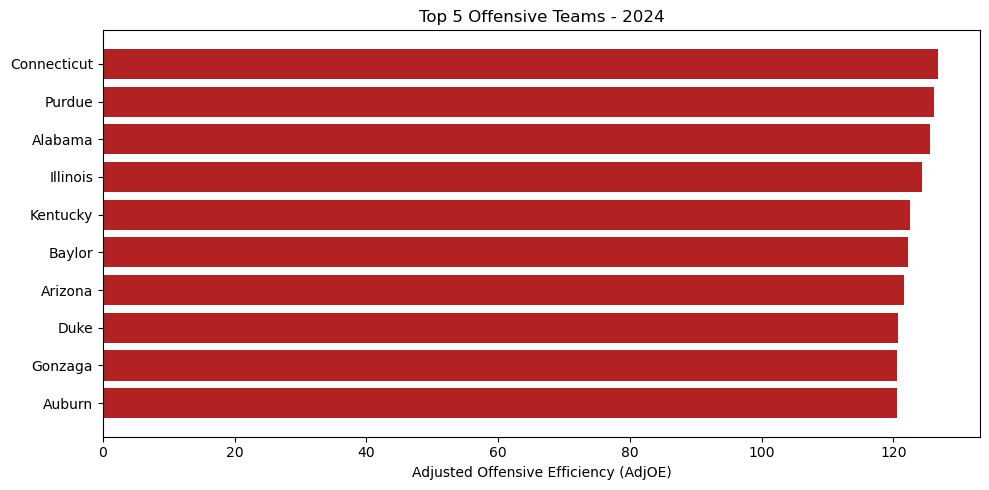

In [33]:
# Define plot function
selected_year = 2024  # <-- change this year manually

data = top_offensive_teams[top_offensive_teams['Year'] == selected_year]
plt.figure(figsize=(10, 5))
plt.barh(data['School'], data['AdjOE'], color='firebrick')
plt.xlabel('Adjusted Offensive Efficiency (AdjOE)')
plt.title(f'Top 5 Offensive Teams - {selected_year}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Correlation of Offensive Metrics with Adjusted Offensive Efficiency (AdjOE)**

In [34]:
# Define the offensive metrics to analyze
offensive_metrics = ['AdjOE', 'EFG%', 'TOR', 'FTR', 'ORB', '2P%', '3P%', '3PR']

In [35]:
# Subset the data for those columns
offense_data = df[offensive_metrics]

In [36]:
# Calculate the correlation matrix
correlation_matrix = offense_data.corr()
correlation_matrix

,AdjOE,EFG%,TOR,FTR,ORB,2P%,3P%,3PR
AdjOE,1.000000,0.604288,-0.516653,-0.131295,0.167657,0.528937,0.412846,0.190533
EFG%,0.604288,1.000000,-0.260322,-0.204811,-0.285708,0.859317,0.690513,0.387619
TOR,-0.516653,-0.260322,1.000000,0.377250,0.359834,-0.225612,-0.173577,-0.299411
FTR,-0.131295,-0.204811,0.377250,1.000000,0.321154,-0.208404,-0.080658,-0.403321
ORB,0.167657,-0.285708,0.359834,0.321154,1.000000,-0.224470,-0.202425,-0.458732
2P%,0.528937,0.859317,-0.225612,-0.208404,-0.224470,1.000000,0.235195,0.363015
3P%,0.412846,0.690513,-0.173577,-0.080658,-0.202425,0.235195,1.000000,0.180801
3PR,0.190533,0.387619,-0.299411,-0.403321,-0.458732,0.363015,0.180801,1.000000


In [37]:
# Extract only correlations with AdjOE (excluding AdjOE itself)
adj_oe_corr = correlation_matrix['AdjOE'].drop('AdjOE').sort_values()
adj_oe_corr

TOR    -0.516653
FTR    -0.131295
ORB     0.167657
3PR     0.190533
3P%     0.412846
2P%     0.528937
EFG%    0.604288
Name: AdjOE, dtype: float64

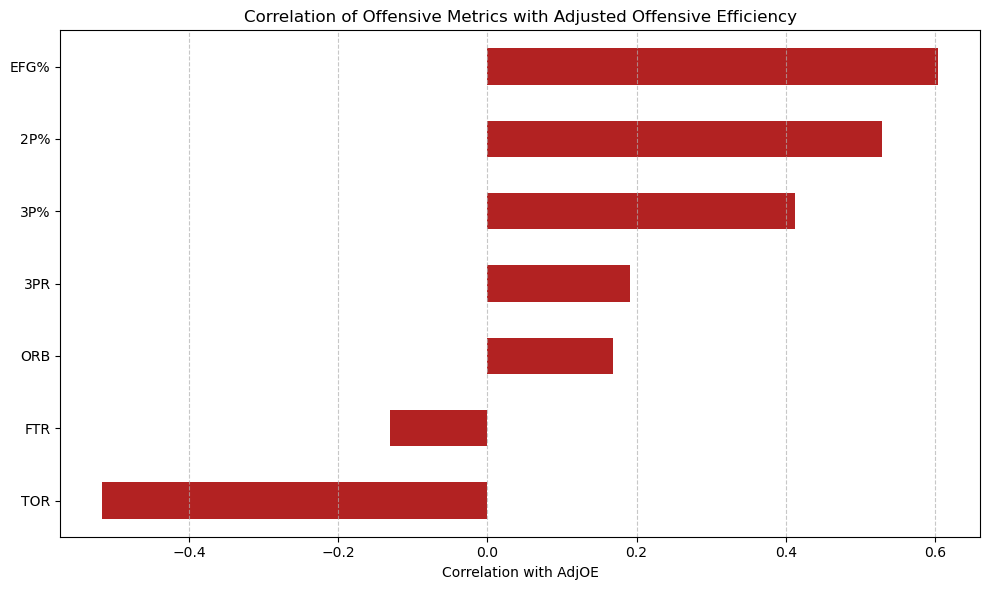

In [38]:
# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
adj_oe_corr.plot(kind='barh', color='firebrick')
plt.xlabel('Correlation with AdjOE')
plt.title('Correlation of Offensive Metrics with Adjusted Offensive Efficiency')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Takeaways**
1. EFG% (Effective Field Goal %) has the strongest positive correlation.
2. TOR (Turnover Rate) has a strong negative correlation — fewer turnovers = better offense.
3. Other metrics like 2P%, 3P%, and ORB show moderate positive influence

**Offensive Metrics by Tournament Round**

In [39]:
# Select and prepare data
df_offense = df[['Round Finished', 'AdjOE', 'EFG%', '2P%', '3P%', 'TOR', 'ORB', 'FTR']].copy()
for col in df_offense.columns[1:]:
    df_offense[col] = pd.to_numeric(df_offense[col], errors='coerce')

In [40]:
# Group and average by round
round_off_avg = df_offense.groupby('Round Finished').mean().reset_index()

# Round name mapping
round_labels = {
    0: 'Round of 64', 1: 'Round of 32', 2: 'Sweet 16', 3: 'Elite Eight',
    4: 'Final Four', 5: 'Runner-Up', 6: 'Champion'
}
round_order = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite Eight', 'Final Four', 'Runner-Up', 'Champion']
round_off_avg['Round Name'] = round_off_avg['Round Finished'].map(round_labels)
round_off_avg = round_off_avg.dropna(subset=['Round Name'])
round_off_avg['Round Name'] = round_off_avg['Round Name'].astype(str)
round_off_avg['Round Order'] = pd.Categorical(round_off_avg['Round Name'], categories=round_order, ordered=True)
round_off_avg = round_off_avg.sort_values('Round Order')

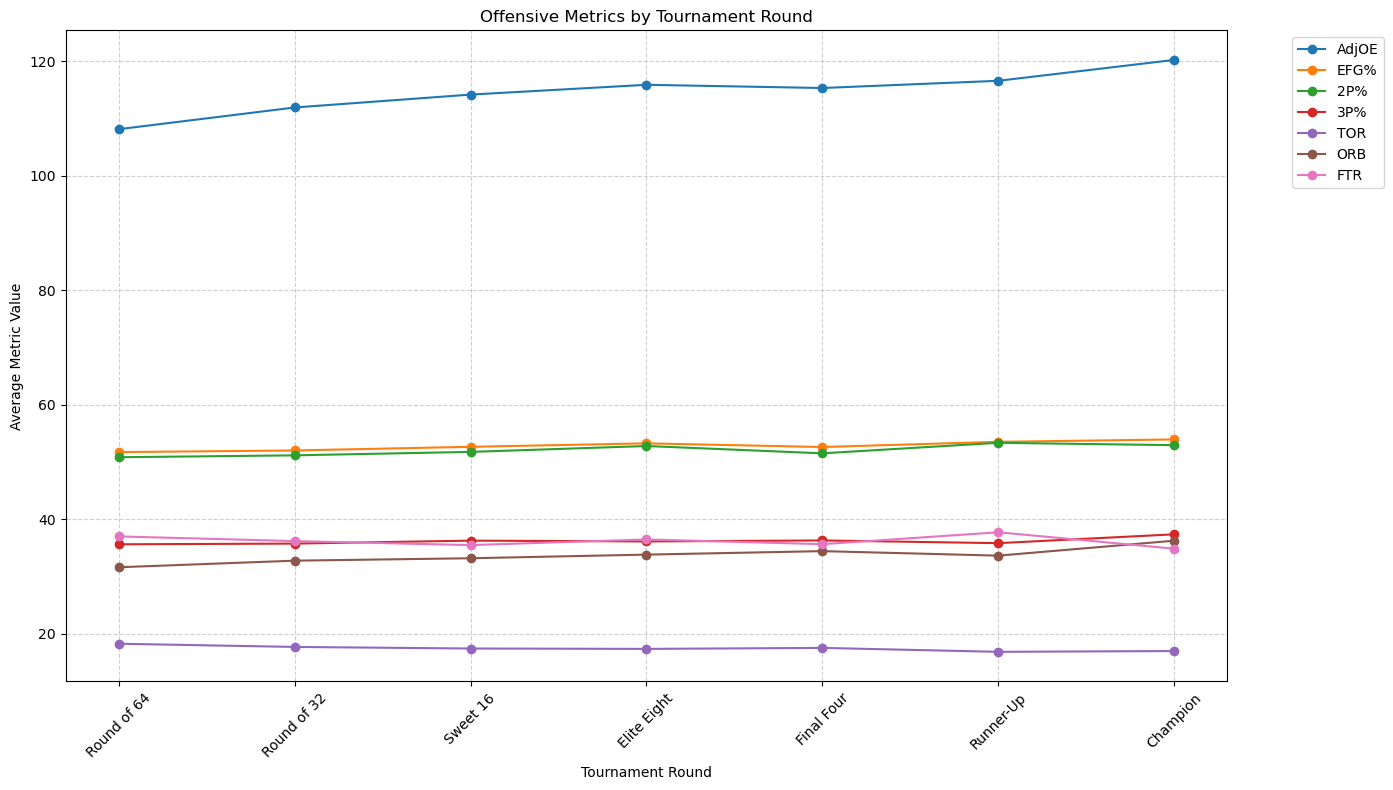

In [41]:
# Plot multiple offensive metrics
plt.figure(figsize=(14, 8))
for metric in ['AdjOE', 'EFG%', '2P%', '3P%', 'TOR', 'ORB', 'FTR']:
    plt.plot(round_off_avg['Round Name'], round_off_avg[metric], marker='o', label=metric)

plt.title('Offensive Metrics by Tournament Round')
plt.xlabel('Tournament Round')
plt.ylabel('Average Metric Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
#Calculate average AdjOE by round
adj_oe_by_round = df.groupby('Round Finished')['AdjOE'].mean().reset_index()

In [43]:
#Map round names
round_labels = {
    0: 'Round of 64', 1: 'Round of 32', 2: 'Sweet 16', 3: 'Elite Eight',
    4: 'Final Four', 5: 'Runner-Up', 6: 'Champion'
    }
adj_oe_by_round['Round Name'] = adj_oe_by_round['Round Finished'].map(round_labels)

In [44]:
#Order the rounds properly
round_order = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite Eight', 'Final Four', 'Runner-Up', 'Champion']
adj_oe_by_round['Round Order'] = pd.Categorical(adj_oe_by_round['Round Name'], categories=round_order, ordered=True)
adj_oe_by_round = adj_oe_by_round.sort_values('Round Order')

adj_oe_by_round = adj_oe_by_round.dropna(subset=['Round Name'])
adj_oe_by_round['Round Name'] = adj_oe_by_round['Round Name'].astype(str)

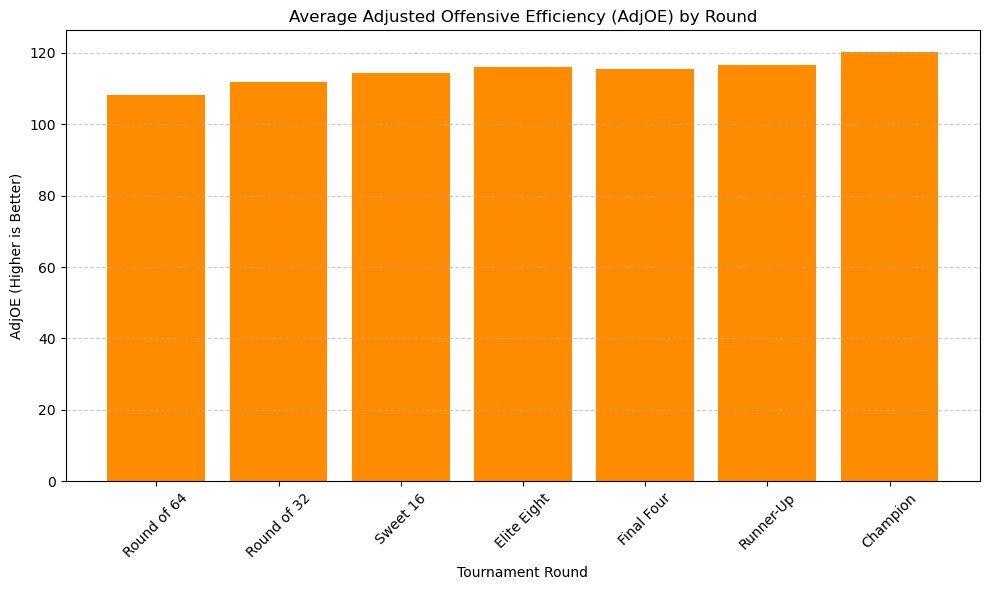

In [45]:
#Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(adj_oe_by_round['Round Name'], adj_oe_by_round['AdjOE'], color='darkorange')
plt.title('Average Adjusted Offensive Efficiency (AdjOE) by Round')
plt.ylabel('AdjOE (Higher is Better)')
plt.xlabel('Tournament Round')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Takeaways**
1. Elite teams tend to get better shot quality and finish more effectively near the rim.
2. Successful teams take better care of the ball as you move toward later rounds. (Lower TOR)
3. Offensive Profile of Champions = Efficient + Careful.
4. Higher rank teams generally have stronger offensive efficiency and shooting metrics, however not a crazy amount mor

**Defensive Analysis**

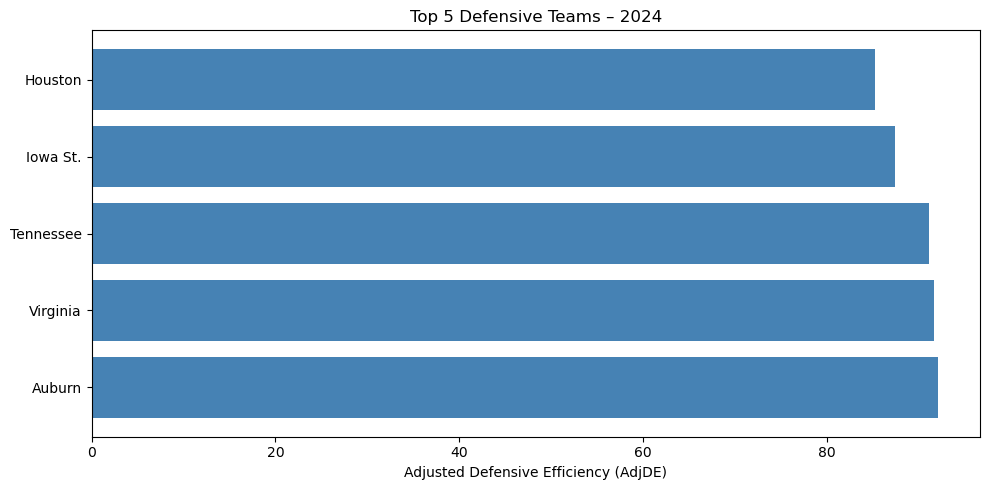

In [46]:
# Define plot function for defense
selected_year = 2024  # <— change this year manually

# Filter for the selected year and sort by lowest AdjDE (better defense)
data_defense = df[df['Year'] == selected_year].sort_values(by='AdjDE').head(5)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(data_defense['School'], data_defense['AdjDE'], color='steelblue')
plt.xlabel('Adjusted Defensive Efficiency (AdjDE)')
plt.title(f'Top 5 Defensive Teams – {selected_year}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Correlation of Defensive Metrics with Adjusted Defensive Efficiency (AdjDE)**

In [47]:
# Define defensive metrics (including AdjDE)
defensive_metrics = ['EFGD%', '2P%D', '3P%D', 'TORD', 'DRB', 'FTRD', 'AdjDE']

In [48]:
# Create a new DataFrame with only those columns and convert to numeric
df_def_corr = df[defensive_metrics].copy()
for col in defensive_metrics:
    df_def_corr[col] = pd.to_numeric(df_def_corr[col], errors='coerce')

# Drop rows with missing values
df_def_corr = df_def_corr.dropna()

In [49]:
# Calculate correlation matrix
correlation_matrix = df_def_corr.corr()

# Extract only correlations with AdjDE (excluding self-correlation)
adjde_corr = correlation_matrix['AdjDE'].drop('AdjDE').sort_values(key=abs, ascending=False)

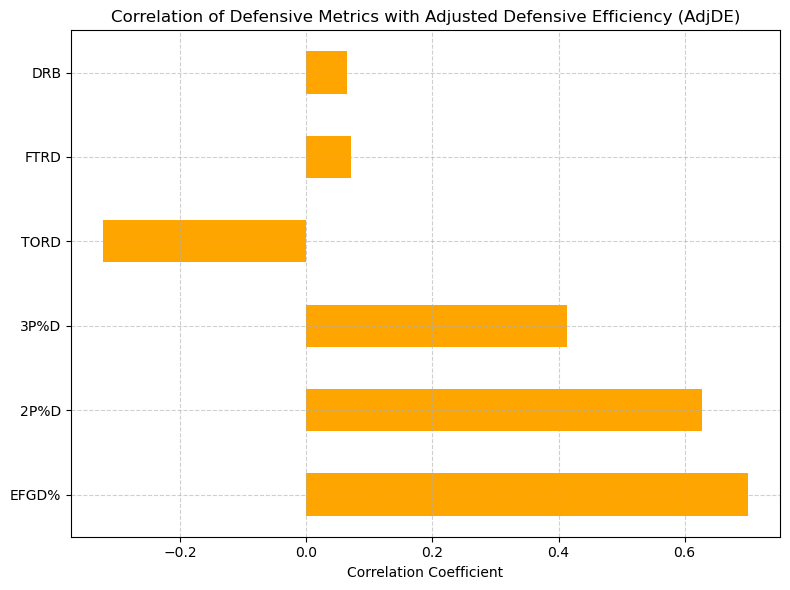

In [50]:
# Plot bar chart
plt.figure(figsize=(8, 6))
adjde_corr.plot(kind='barh', color='orange')
plt.title('Correlation of Defensive Metrics with Adjusted Defensive Efficiency (AdjDE)')
plt.xlabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Takeaways**
1. EFGD% (Opponent Effective FG%) has the strongest positive correlation with AdjDE (~0.70)
2. 2P%D (Opponent 2-point shooting %) is also strongly correlated (~0.63)
3. Protecting the paint is key to overall defensive success.
4. Forcing turnovers improves AdjDE (as expected).
5. FTRD & DRB correlations are relatively weak.

**Defensive Metrics by Tournament Round**

In [51]:
# Select and prepare data
df_defense = df[['Round Finished', 'AdjDE', 'EFGD%', '2P%D', '3P%D', 'TORD', 'DRB', 'FTRD']].copy()
for col in df_defense.columns[1:]:
    df_defense[col] = pd.to_numeric(df_defense[col], errors='coerce')

In [52]:
# Group and average by round
round_def_avg = df_defense.groupby('Round Finished').mean().reset_index()

# Round name mapping
round_labels = {
    0: 'Round of 64', 1: 'Round of 32', 2: 'Sweet 16', 3: 'Elite Eight',
    4: 'Final Four', 5: 'Runner-Up', 6: 'Champion'
}
round_order = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite Eight', 'Final Four', 'Runner-Up', 'Champion']
round_def_avg['Round Name'] = round_def_avg['Round Finished'].map(round_labels)
round_def_avg['Round Order'] = pd.Categorical(round_def_avg['Round Name'], categories=round_order, ordered=True)
round_def_avg = round_def_avg.sort_values('Round Order')

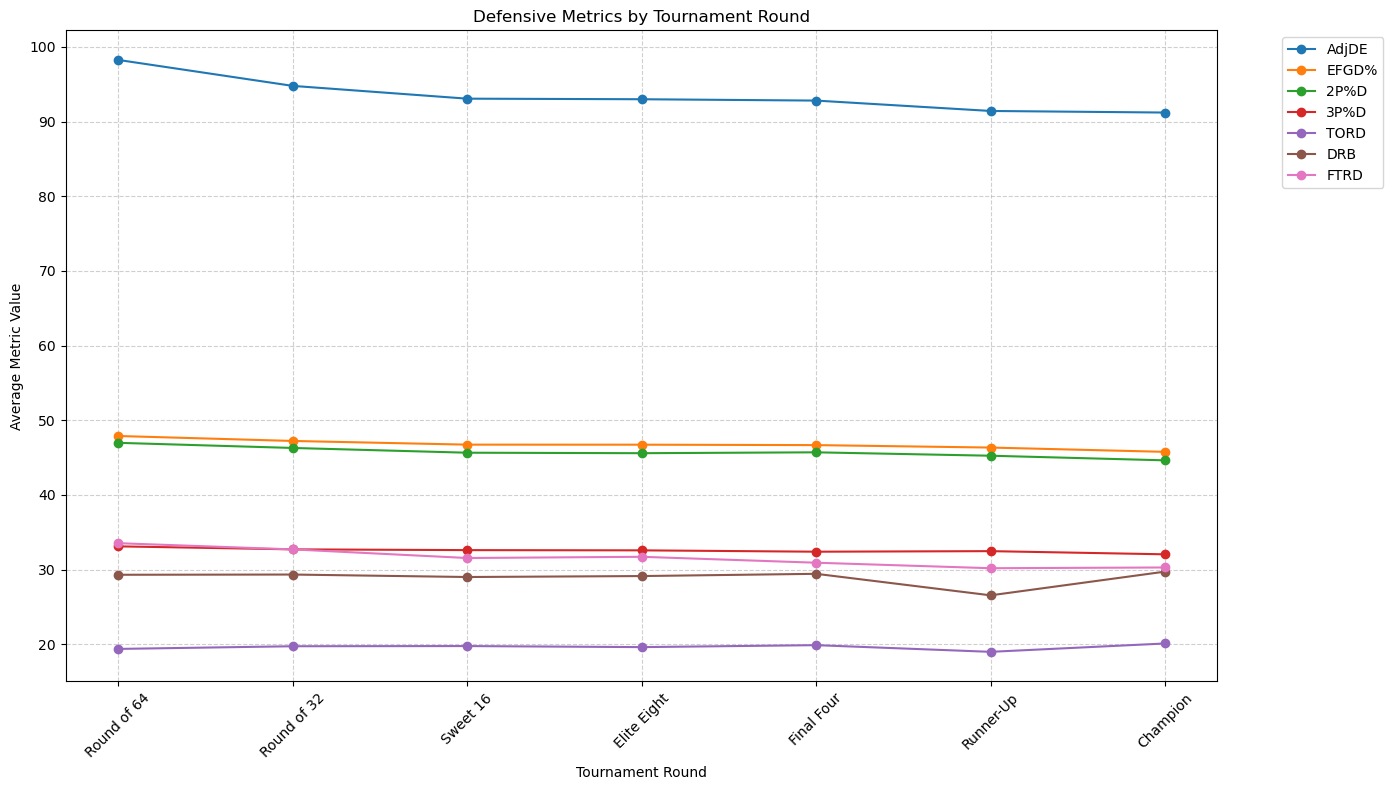

In [53]:
# Drop missing and fix type for Round Name
round_def_avg = round_def_avg.dropna(subset=['Round Name'])
round_def_avg['Round Name'] = round_def_avg['Round Name'].astype(str)

# Plot multiple defensive metrics
plt.figure(figsize=(14, 8))
for metric in ['AdjDE', 'EFGD%', '2P%D', '3P%D', 'TORD', 'DRB', 'FTRD']:
    plt.plot(round_def_avg['Round Name'], round_def_avg[metric], marker='o', label=metric)

plt.title('Defensive Metrics by Tournament Round')
plt.xlabel('Tournament Round')
plt.ylabel('Average Metric Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

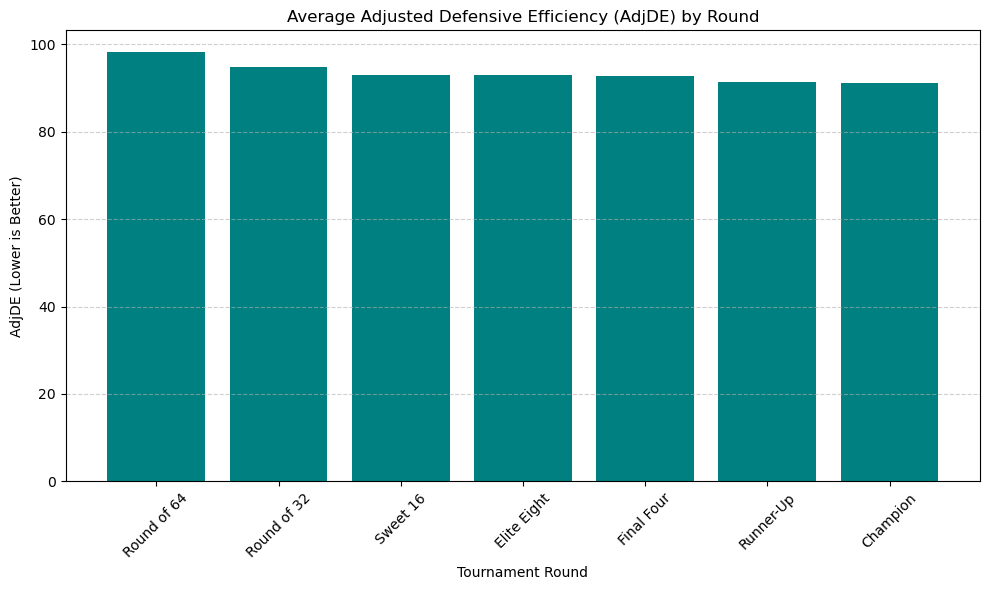

In [54]:
#Bar chart comparing average AdjDE by Round
plt.figure(figsize=(10,6))
plt.bar(round_def_avg['Round Name'], round_def_avg['AdjDE'], color='teal')
plt.title('Average Adjusted Defensive Efficiency (AdjDE) by Round')
plt.ylabel('AdjDE (Lower is Better)')
plt.xlabel('Tournament Round')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Takeaways**
1. Elite teams consistently have top-tier defenses — this is a stronger differentiator than offense.
2. Deep-advancing teams limit opponent shot quality more effectively.
3. Stronger teams force more turnovers, contributing to defensive disruption.
4. Deep teams tend to limit second-chance opportunities effectively.
5. Defensive metrics (especially AdjDE and EFGD%) have a more pronounced shift from early to late rounds.
6. This reinforces the idea that great defense travels further in March.